### 이미지 분류 문제에는 인공 신경망(ANN)이 잘 맞는다.
- 가장 기본적인 인공 신경망(ANN)은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다.
- tensorflow에는 저수준 API / 고수준 API가 존재
    - 고수준 API: keras
    - keras 라이브러리: 직접 GPU 연산을 수행하지 않고, tensorflow(다른 라이브러리도 있음)라는 백엔드를 사용
- 딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점 중 하나는 그래픽 처리 장치인 GPU를 사용
    - GPU 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경말에 큰 도움

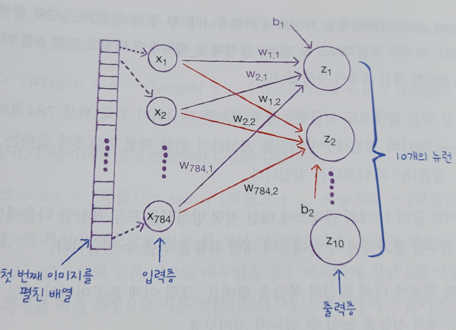

- z1 ~ z10을 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종값을 만든다는 의미에서 **출력층(output layer)**
- 인공 신경망에서는 z값을 계산하는 단위를 **뉴런 혹은 유닛(선형 계산이 전부임)**
- x1 ~ x784까지 **입력층(input layer)**

In [1]:
import tensorflow as tf
from tensorflow import keras

### 인경 신경망으로 모델만들기
- 1) 로지스틱 회귀에서는 교차 검증을 사용해 모델을 평가
- 2) 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용
    - a) 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적.
    - b) 교차 검증을 수행하기에는 훈련시간이 너무 오래 걸린다.

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


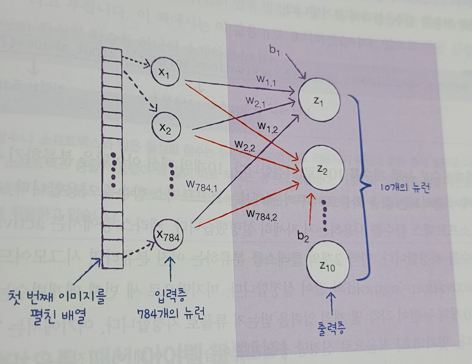

- 10개의 패션 아이템을 분류하기 위해 10개의 뉴런으로 구성
- 밀집층(dense layer): 빡빡하게 입력층이 출력층에 연결되어 있기 때문에

#### dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#### 신경망에서 가장 기본층인 밀집층을 만드는 클래스
- 첫 번째 매개변수(10): 뉴런 개수를 10개로 지정(10개의 패션 아이템을 분류하기 때문에)
- 두 번째 매개변수(softmax): 10개의 뉴런에서 출력되는 값을 확률로 바꾸기 위해서 소프트맥스 함수 사용
    - 2개의 클래스를 분류하는 이진 분류일 경우: 시그모이드 함수 사용.
- 세 번째 매개변수(입력값의 크기): 10개의 뉴런이 각각 몇개의 입력을 받는지 튜플로 지정

In [4]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

#### 밀집층을 가진 신경망 모델을 생성
- keras의 sequential 클래스 사용
- 신경망 모델에 추가할 층을 지정할 수 있음.
- 추가할 층이 1개 이상일 경우 파이썬 리스트로 전달

In [5]:
model = keras.Sequential(dense)

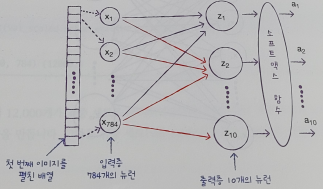

### 인공 신경망으로 패션 아이템 분류하기
- keras 모델 훈련하기 전에 설정 단계
    - model 객체의 compile() 메서드 수행
    - 손실 함수의 종류 지정
    - 훈련 과정에서 계산하고 싶은 측정값을 지정

#### Compile()
- 모델 객체를 만든 후 훈련하기 전에 사용할 손실 함수와 측정 지표등을 지정하는 메서드

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

#### loss function 종류
- 이진분류: binary_crossentropy

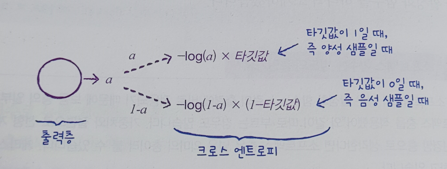


- 다중분류: categorical_crossentropy
    - 각 클래스에 대한 확률이 모두 출력되기 때문에, 타깃에 해당하는 확률만 남겨 놓기 위해 **원-핫 인코딩** 진행
    - tensorflow에서는 정수로 된 타깃값을 원-핫 인코딩으로 변경하지 않고 크로스 엔트로피 손실을 계산하는 것이 **sparse_categorical_crossentropy**
    - 만약 원-핫 인코딩을 준비했다면, compile()에서 손실함수를 **loss='categorical_crossentropy'**로 지정
    
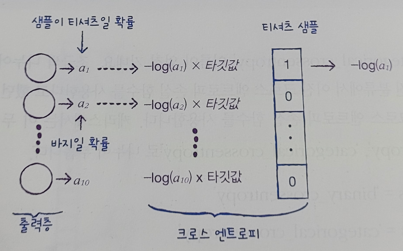


### 모델 훈련
- 각 epoch마다 걸린 시간, 손실, 정확도 출력

In [7]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 762us/step - loss: 0.6082 - accuracy: 0.7946
Epoch 2/5
1500/1500 [==============================] - 1s 762us/step - loss: 0.4788 - accuracy: 0.8403
Epoch 3/5
1500/1500 [==============================] - 1s 701us/step - loss: 0.4567 - accuracy: 0.8470
Epoch 4/5
1500/1500 [==============================] - 1s 704us/step - loss: 0.4441 - accuracy: 0.8526
Epoch 5/5
1500/1500 [==============================] - 1s 696us/step - loss: 0.4364 - accuracy: 0.8561


### 모델 성능 평가

In [8]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 599us/step - loss: 0.4447 - accuracy: 0.8520


[0.44474872946739197, 0.8519999980926514]

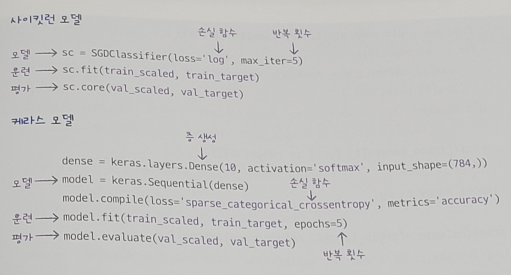